<div style="border:solid green 2px; padding: 20px">
    
<b>Ростислав, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> 
    <b>Комментарии студента:</b> 
    Например, вот так.
    </div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
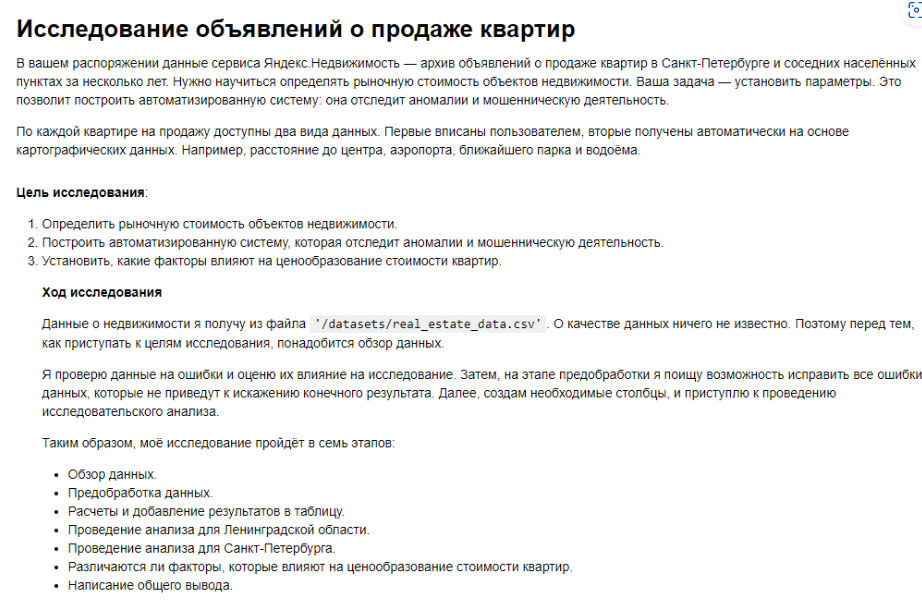
</div>

<div class="alert alert-info"> 
    <b>Комментарии студента:</b> 
    Понял, в следующий раз учту)
    </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Договорились =)
</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [2]:
print(data.head()) #выяснили, что данные разделены табуляцией, следовательно ввели в функцию параметр sep

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что во многих столбцах имеются пропущенные значения, значит следом нужно изучить характер пропусков и если требуется, устранить их

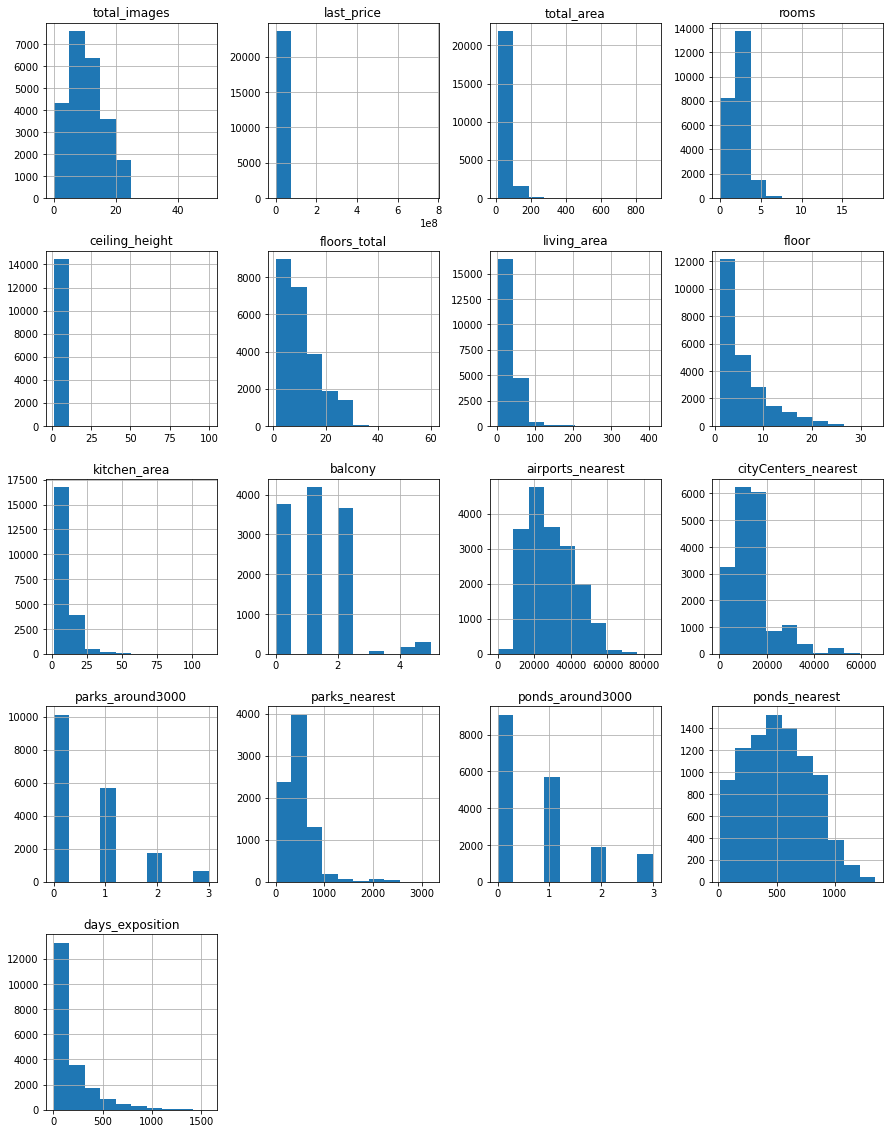

In [4]:
data.hist(figsize=(15, 20)); 

Можно заметить, что во многих данных есть выбросы, от которых мы вскоре избавимся. Также прослеживаются распределения Пуассона и нормальные распределения

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку `matplotlib.pyplot as plt`
2. В конец кода добавить `;`
    
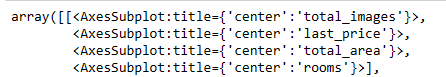
</div>

### Предобработка данных

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

<div class="alert alert-info"> 
    <b>Комментарии студента:</b> 
    Ого, полезная фича, спасибо)
    </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Рад, что воспользовался
</div>

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Из вывода метода инфо мы выяснили, что данные пропущены почти во всех столбцах. Далее выясним характер пропусков.
Начнем с изучения столбцов, где пропусков меньше всего - это столбцы locality_name, floors_total, living_area, days_exposition

In [6]:
data[data['locality_name'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


<div class="alert alert-info"> 
    <b>Комментарии студента:</b> 
    Понял, в следующий раз учту)
    </div>

Данные не похоже на ошибочные, так как в других столбцах имеются значения, следовательно, либо населенные пункты не имеют названия, либо пользователи данную информацию не указали, так как пропусков немного, то можем просто от этих данных избавиться

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Оставлю общий комментарий по проекту. Давай все выводы и ходы действий перенесем в обычную ячейку markdown? Комментировать стоит лишь сам код
</div>

<div class="alert alert-info"> 
    <b>Комментарии студента:</b> 
    Окей
    </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Спасибо за правку. Так намного лучше
</div>

In [7]:
data.dropna(subset=['locality_name'],inplace=True)

In [8]:
data[data['floors_total'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [9]:
data[data['days_exposition'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.0,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


Скорее всего это те данные, которые до сих пор выставлены на сайте объявлений и которых не так много, значит мы от них тоже можем избавиться

In [10]:
data.dropna(subset=['days_exposition'],inplace=True)

Данные в колонках с 1 по 15 являются данными, заполняемые пользователями, а последующие являются данными картографическими, кроме days_exposition.
Исследуем характер пропусков в пользовательских данных


In [11]:
data[data['ceiling_height'].isna()].head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Скорее всего пользователи забыли указать высоту потолков,поэтому данные пропуски можно заполнить медианным значением, но сначала посмотрим на базовые метрики

In [12]:
data['ceiling_height'].describe()

count    12037.000000
mean         2.761539
std          1.264449
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Здесь мы видим нереалистичные значения минимума и максимума, следовательно, мы можем удалить данные строки(если их не много). Высоту потолка зададим в диапазоне от 2 до 5 метров, так как это жилые квартиры, а не коммерческая недвижимость

In [13]:
data.query('2 >= ceiling_height  or ceiling_height >= 5').shape[0] 

40

Таких строк не очень много, следовательно можем от них избавиться

In [14]:
data = data.query('2 < ceiling_height < 5 or ceiling_height.isna()')

In [15]:
data['ceiling_height'].describe()

count    11997.000000
mean         2.718771
std          0.263332
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

#изменилось среднее и стандартное отклонение,
#причем стандартное отклонение теперь выглядит правдоподобным, но медианное значение не поменялось
#следовательно пропущенные значения можем заменить на медианные

In [16]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Присваиваем пропускам медианное значение

In [17]:
data[data['ceiling_height'].isna()]['ceiling_height'].count()

0

#проверяем заполнились ли пропуски

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               76
living_area              1695
floor                       0
is_apartment            17958
studio                      0
open_plan                   0
kitchen_area             2054
balcony                  9387
locality_name               0
airports_nearest         4652
cityCenters_nearest      4630
parks_around3000         4630
parks_nearest           13525
ponds_around3000         4630
ponds_nearest           12576
days_exposition             0
dtype: int64

In [19]:
data.dropna(subset=['floors_total'], inplace=True)

Удаляем пропуски в данном столбце, так как их немного и они не повлияют на показатели

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верно, если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время
</div>

In [20]:
data[['living_area', 'kitchen_area']].describe()

,living_area,kitchen_area
count,18689.000000,18343.000000
mean,33.524947,10.427920
std,21.304037,5.677668
min,2.000000,2.000000
25%,18.300000,7.000000
50%,30.000000,9.100000
75%,41.600000,11.900000
max,409.700000,112.000000


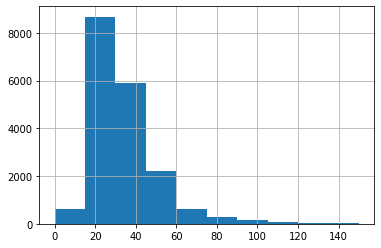

In [21]:
data['living_area'].hist(range=(0,150));

Медианное значение похоже на правду

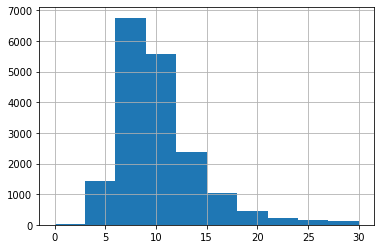

In [22]:
data['kitchen_area'].hist(range=(0,30));

In [23]:
data['living_area'].fillna(data['living_area'].median(), inplace=True)
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)

Заполняем медианным значением пропуски в этих колонках

In [24]:
data['is_apartment'].unique() 

array([nan, False, True], dtype=object)

Во-первых, в данной колонке неверный тип данных, во-вторых имеются много пропущенных значений. Сначала преобразуем тип данных, а потом будем работать с пропусками

In [25]:
data['balcony'].unique() 

array([ 2.,  0., nan,  1.,  5.,  4.,  3.])

Здесь нужно изменить тип данных на int, так как значения целочисленные, а также в пропущенные значения подставить ноль, так как если продавец не указал число балконов, то, скорее всего, в его квартире их нет

In [26]:
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce')

Сразу перевести в тип данных int невозможно, так как имеются пропущенные значения подставим в пропущенные значения 0 и изменим тип данных на int

In [27]:
data['balcony'].fillna(0, inplace=True)
data['balcony'] = data['balcony'].astype('int')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

<div class="alert alert-info">
    
Каким более простым методом можно изменить тип данных на булевый?


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

    data['is_apartment'] = data['is_apartment'].fillna(bool)
</div>

In [28]:
data[data['is_apartment']=='True'] = True
data[data['is_apartment']=='False'] = False 

Если в данных не указано значение, то скорее всего жилплощадь не являлась апартаментом, следовательно заменяем значения на False

In [29]:
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()#проверка

0

In [30]:
data['is_apartment'].dtype

dtype('bool')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20354 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          20354 non-null  object
 1   last_price            20354 non-null  object
 2   total_area            20354 non-null  object
 3   first_day_exposition  20354 non-null  object
 4   rooms                 20354 non-null  object
 5   ceiling_height        20354 non-null  object
 6   floors_total          20354 non-null  object
 7   living_area           20354 non-null  object
 8   floor                 20354 non-null  object
 9   is_apartment          20354 non-null  bool  
 10  studio                20354 non-null  bool  
 11  open_plan             20354 non-null  bool  
 12  kitchen_area          20354 non-null  object
 13  balcony               20354 non-null  object
 14  locality_name         20354 non-null  object
 15  airports_nearest      15711 non-null

В столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 почти одинаковое количество пропусков, так как эти данные картографические и значит пользователь не указал геопозицию пропуски в данных составляют существенное количество, значит просто так мы от них избавиться не можем, но и заполнить их логичными значениями тоже не можем, следовательно оставляем пропуски как есть, они могут также являться важны сигналом

Также, чтобы можно было применять различные методы к значениям и делать по ним выводы, 
нужно их привести в правильный тип данных

In [32]:
for column in data:
    #print(column)
    if data[column].dtype==object and column != 'locality_name' and column != 'first_day_exposition':
        data[column] = pd.to_numeric(data[column], errors='coerce')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь собственные функции

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].head()

1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
Name: first_day_exposition, dtype: datetime64[ns]

Пропущенные значения в столбцах parks_nearest и ponds_nearest можно заполнить по имеющимся значениям из столбцов количества ближайших в радиусе 3000 метров прудов и парков.


In [34]:
data.pivot_table(index='parks_around3000', values='parks_nearest', aggfunc=['median','count'])

,median,count
,parks_nearest,parks_nearest
parks_around3000,,
0.0,3127.0,4
1.0,501.0,4839
2.0,360.0,1490
3.0,304.0,540


Из данной сводной таблицы видим, что значений в стоблце parks_nearest с 0 парков в радиусе 3000 аномально мало, следовательно, можно сделать вывод, что расстояние до ближайшего парка почти не фиксировалось в данных, если его нет вблизи 3000 метров

In [35]:
data.pivot_table(index='ponds_around3000', values='ponds_nearest', aggfunc=['median','count'])#тоже самое здесь

,median,count
,ponds_nearest,ponds_nearest
ponds_around3000,,
0.0,NaN,0
1.0,595.0,4923
2.0,440.0,1630
3.0,309.0,1254


Значит разницу пропущенных данных мы не можем заполнить 

Также возникла гипотеза, что пропущенные картографические данные могут быть связаны с фейковыми объявлениями, на которых не выставляются фотографии. Проверим ее:


In [36]:
data.query('total_images == 0 and cityCenters_nearest.isna()')['total_images'].count()

231

Всего 231 объявление, значит гипотеза не верна

Следом удалим явные и неявные дубликаты. Неявные дубликаты можно определить только в столбце locality_name 

In [37]:
data.duplicated().sum()#явных дубликатов нет

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных
</div>

In [38]:
print(data['locality_name'].nunique())
data.replace({'locality_name':{'ё':'е'}}, regex=True, inplace=True)

data.replace(
    {'locality_name':{
        'поселок ':'',
        'деревня ':'',
        'городского типа ':'',
        'городской ':'',
        'село ':'',
        'коттеджный':'',
        'станции ':'',
        'при железнодорожной станции':'',
        'садовое товарищество ':'',
        'садоводческое некоммерческое товарищество ':''}
    }, regex=True, inplace=True
)
print(data['locality_name'].nunique())

328
280


Неявных дубликатов было 48 штук и все мы устранили

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Можно например вот так:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
    
</div>

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20354 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20354 non-null  int64         
 1   last_price            20354 non-null  float64       
 2   total_area            20354 non-null  float64       
 3   first_day_exposition  20354 non-null  datetime64[ns]
 4   rooms                 20354 non-null  int64         
 5   ceiling_height        20354 non-null  float64       
 6   floors_total          20354 non-null  float64       
 7   living_area           20354 non-null  float64       
 8   floor                 20354 non-null  int64         
 9   is_apartment          20354 non-null  bool          
 10  studio                20354 non-null  bool          
 11  open_plan             20354 non-null  bool          
 12  kitchen_area          20354 non-null  float64       
 13  balcony         

In [40]:
data['days_exposition'] = data['days_exposition'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['last_price'] = data['last_price'].astype('int')

Вывод: Пропусков в данных больше в картографических показателях, следовательно нужно провести доработку в сфере сбора данных по данным критериям. Если конкретно, то сбор информации о ближайшем парке дальше 3км не проводился(хотя может оно и не надо). По большей части пропуски в картографиских данных не были заполнены. Также пропуски были и в пользовательских данных и в основном они были в булевых значениях, которые в свою очередь были заполнены логичными значениями. В столбцах по высоте потолков пропуски были заполнены медианными значениями, а также были удалены аномальные значения. 
Также значения не были изначально приведены в правильные типы данных. 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Не все столбцы имеют корректный тип данных. Например `floors_total` имеет дробный тип. Но ведь не может быть 9.5 этажей в доме. Как думаешь?
    
    
        
---
    
Так же отсутствует вывод после раздела (можно описать качество исходных данных). Поправишь, этот момент в проекте?
</div>

<div class="alert alert-info">✍
    


Сделано
    
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Всё верно
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [41]:
data['price_meter'] = data['last_price'] / data['total_area'] #колонка стоимости одного квадратного метра

In [42]:
data['week_day'] = data['first_day_exposition'].dt.weekday #колонка с номером дня недели от 0 до 6

In [43]:
data['month'] = data['first_day_exposition'].dt.month #колонка с номером месяца от 1 до 12

In [44]:
data['year'] = data['first_day_exposition'].dt.year

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-info">📝
    
Спасибо)
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

In [45]:
def type_of_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой'

data['type_of_floor'] = data.apply(type_of_floor, axis=1)# колонка типов этажей 

In [46]:
data['center_km'] = data['cityCenters_nearest'] // 1000 #колонка расстояния до центра в километрах в округленных значениях

In [47]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_day,month,year,type_of_floor,center_km
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,18.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,13.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой,6.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55,95065.789474,0,9,2018,другой,NaN


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

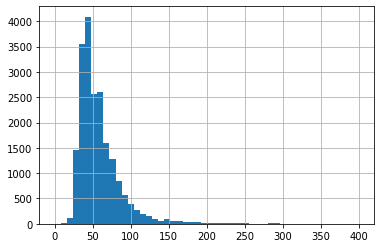

In [48]:
data['total_area'].hist(bins=50, range=(0,400));

Гистограмма распределения общей площади. Распределение Пуассона

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

In [49]:
data['total_area'].describe() 

count    20354.000000
mean        58.822235
std         33.958685
min         12.000000
25%         39.550000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64

Cрез данных можно оценивать до 200 кв.м

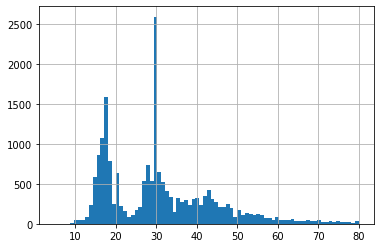

In [50]:
data['living_area'].hist(bins=80, range=(5,80)); 

Гистограмма распределения жилой площади. Распределение Пуассона. Берем срез до 80 кв.м. и исключаем аномальные значения 30кв.м.

In [51]:
data['living_area'].value_counts() 

30.00     2176
18.00      799
17.00      611
16.00      451
20.00      438
          ... 
49.25        1
125.10       1
33.47        1
20.97        1
16.74        1
Name: living_area, Length: 1617, dtype: int64

Виден всплеск значений до 25 кв.м. Это может быть связано с тем, что у типовых застроек. Жилая площадь не была равна данному значению. Или эта разница в площади между типовыми значениями площадей студий и 1 комн.кв.

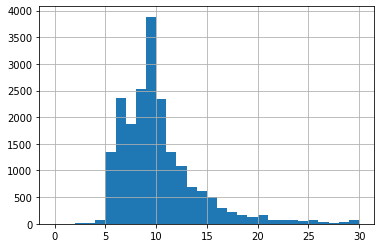

In [52]:
data['kitchen_area'].hist(bins=30, range=(0,30));

Гистограмма распределения площади кухни. Распределение Пуассона. Берем срез до 30 кв.м.

In [53]:
data['kitchen_area'].value_counts()

9.10     2083
6.00     1135
10.00    1121
8.00      958
9.00      952
         ... 
15.72       1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 884, dtype: int64

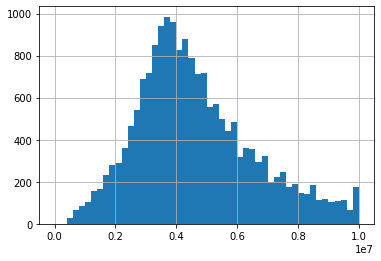

In [54]:
data['last_price'].hist(bins=50, range=(0,10000000));

Гистограмма распределения цены квартиры. Распределение Пуассона

In [55]:
data['last_price'].describe()

count    2.035400e+04
mean     6.256338e+06
std      1.085495e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Срез по данным можно делать от 1 до 6.5 миллионов

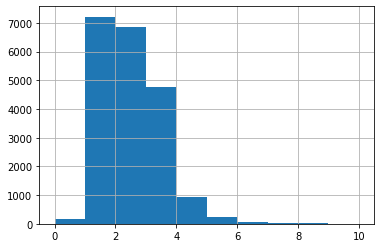

In [56]:
data['rooms'].hist(bins=10, range=(0,10));

Гистограмма распределения количества комнат. Распределение Пуассона

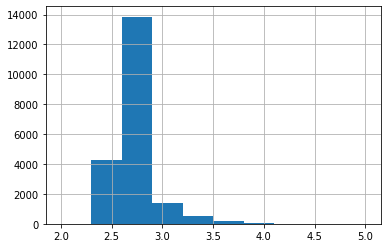

In [57]:
data['ceiling_height'].hist(bins=10, range=(2,5));

Гистограмма распределения высоты потолка. Распределение Пуассона

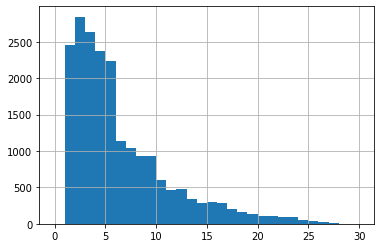

In [58]:
data['floor'].hist(bins=30, range=(0,30));

Гистограмма распределения этажа квартиры. Распределение Пуассона

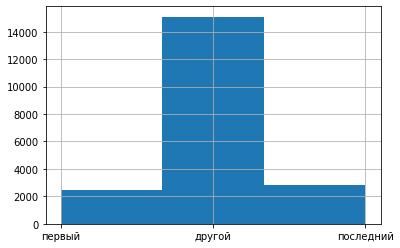

In [59]:
data['type_of_floor'].hist(bins=3);

Гистограмма распределения типа этажа. Категориальные показатели, поэтому конкретного типа распределения не наблюдается

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

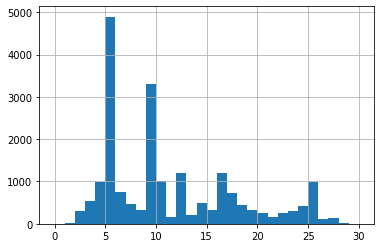

In [60]:
data['floors_total'].hist(bins=30, range=(0,30));

Гистограмма распределения количества этажей в домах. Характерный всплески на значениях 5, 9, 12, 16, 25 связаны с этажностью типовых домов

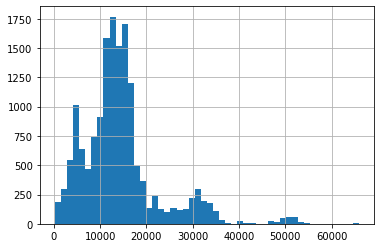

In [61]:
data['cityCenters_nearest'].hist(bins=50);

Гистограмма распределения расстояния до центра. Распределение Пуассона. Провал значений до 10 км скорее всего связан с границей между городом и областью.

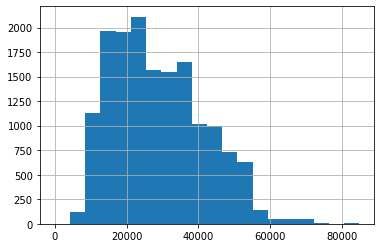

In [62]:
data['airports_nearest'].hist(bins=20);

Гистограмма распределения расстояния до ближайшего аэропорта. Распределение Пуассона

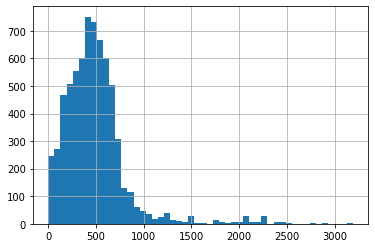

In [63]:
data['parks_nearest'].hist(bins=50);

Гистограмма распределения расстояния до ближайшего парка. Распределение Пуассона

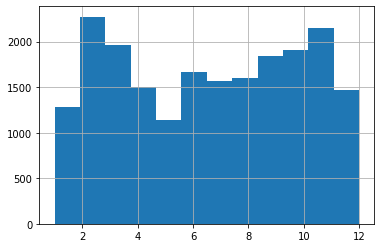

In [64]:
data['month'].hist(bins=12);

Спад количества публикаций летом и зимой связаны с отпусками и новогодними праздниками.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

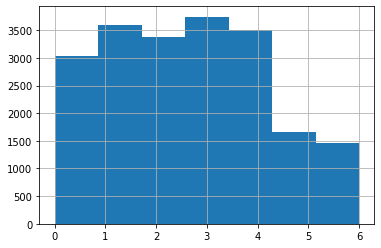

In [65]:
data['week_day'].hist(bins=7);

 Спад количества объявлений в выходные выглядит логичным

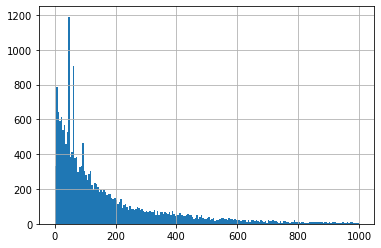

In [66]:
data['days_exposition'].hist(bins=200, range=(0,1000));

In [67]:
data['days_exposition'].describe()

count    20354.000000
mean       180.772575
std        219.795759
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Теоретически продать квартиру за неделю можно, но скорее всего такие значения связаны с тем, что продавец передумал продавать квартиру или просто удалил объявление по ошибке. Также продажа квартиры с длительностью в года тоже маловероятна, значит исключим значения превышающие 2 года

In [68]:
data['days_exposition'].value_counts().head(10)

45    878
60    538
7     233
30    207
90    200
4     174
3     157
5     152
14    146
9     142
Name: days_exposition, dtype: int64

Видны аномальные всплески значений на круглых датах: 30, 45, 60, 90. Это может быть связано с днями автоматического снятия объявления, значит квартиры были проданы до этих дней и пользователи просто забыли удалить объявление с сайта. Для анализа количества дней в продаже можно было бы исключить данные дни, так как они нарушают картину распределения. Но так как медиана находится выше, то они на нее влиять не будут, а если мы эти значения уберем, то они исказят показатель медианы, так как таких значений значительное количество

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы не рекомендовал их удалять, т.к. эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил
</div>

<div class="alert alert-info">📝
    
Я эти значения и не удалял) Техническую особенность также описал
</div>

In [69]:
data_exp = data.query('days_exposition != [30, 45, 60, 90]')
data_exp['days_exposition'].value_counts().head(10)

7     233
4     174
3     157
5     152
14    146
9     142
20    139
44    138
8     137
11    135
Name: days_exposition, dtype: int64

In [70]:
data_exp = data.query('6 < days_exposition < 700')

<AxesSubplot:>

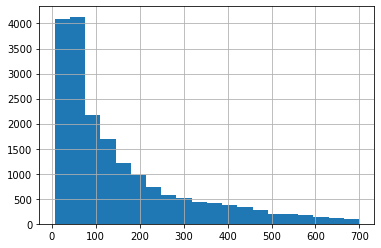

In [71]:
data_exp['days_exposition'].hist(bins=20)

In [72]:
data_exp['days_exposition'].describe() 

count    18892.000000
mean       152.373650
std        151.174661
min          7.000000
25%         45.000000
50%         93.000000
75%        210.000000
max        699.000000
Name: days_exposition, dtype: float64

Категорию быстрых продаж и долгих можно отделить квартилями, то есть до 45 дней это быстрая продажа, а после 210 уже долгая.
В среднем продажа квартиры осуществляется за 93 дня.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, до 1.5 месяцев можно назвать быстрой продажей
</div>

In [73]:
data[['last_price', 'total_area', 'kitchen_area', 'living_area']].corr()

,last_price,total_area,kitchen_area,living_area
last_price,1.000000,0.642113,0.423662,0.532718
total_area,0.642113,1.000000,0.574315,0.888354
kitchen_area,0.423662,0.574315,1.000000,0.415168
living_area,0.532718,0.888354,0.415168,1.000000


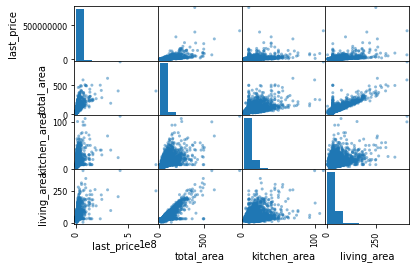

In [74]:
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'kitchen_area', 'living_area']]);

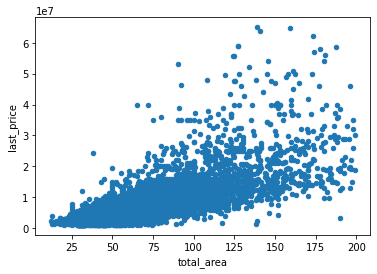

In [75]:
(
    data
    .query('1000000 < last_price < 65000000 and total_area < 200')
    .plot(y='last_price', x='total_area', kind='scatter')
);

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что зависимость переменных рассматриваешь через тип графика scatter
</div>

In [76]:
data_p_ta = data.query('1000000 < last_price < 65000000 and total_area < 200')
data_p_ta['last_price'].corr(data_p_ta['total_area']) 

0.7502192504893964

Корреляция стала выше с 0.64 до 0.75, когда мы отбросили аномальные значения и выбросы. В целом прослеживается большая зависимость общей площади квартиры от ее цены, что выглядит логичным. После 100 кв.м. диапазон цен резко увеличивается и данные теряют кучность.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Лучше после каждого раздела, графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи - так проще читать проект, поскольку будущим коллегам или заказчику не надо будет самим интерпретировать результаты каждого раздела, теста или графика.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

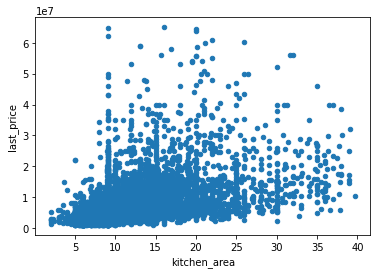

In [77]:
(
    data
    .query('1000000 < last_price < 65000000 and kitchen_area < 40')
    .plot(y='last_price', x='kitchen_area', kind='scatter')
);

In [78]:
data_p_ta = data.query('1000000 < last_price < 65000000 and total_area < 40')
data_p_ta['last_price'].corr(data_p_ta['kitchen_area'])

0.3054235204833456

Корреляция стала ниже с 0.42 до 0.30, следовательно по более репрезентативному срезу взаимосвязь между двумя величинами меньше (почти нет). По большей части эта малейшая зависимость проявляется тем фактом, что площадь кухни в свою очередь зависит от общей площади квартиры.

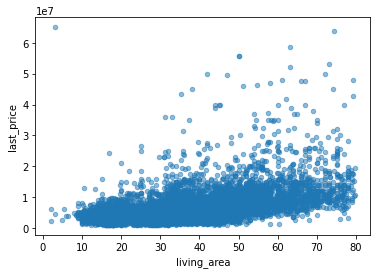

In [79]:
(
    data
    .query('1000000 < last_price < 65000000 and living_area < 80 and living_area != 30')
    .plot(y='last_price', x='living_area', kind='scatter', alpha=0.5)
);

In [80]:
data_l_ta = data.query('1000000 < last_price < 65000000 and living_area < 80 and living_area != 30')
data_l_ta['last_price'].corr(data_l_ta['living_area'])

0.5647761260688189

Корреляция стала незначительно выше с 0.53 до 0.56, следовательно имеется небольшая зависимость величин. Причина зависимости по большей части опять связана с зависимостью от общей площади.

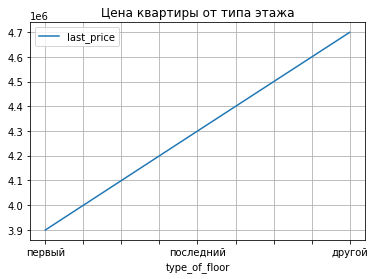

In [81]:
(
    data
    .query('1000000 < last_price < 65000000')
    .pivot_table(index='type_of_floor', values='last_price', aggfunc='median')
    .sort_values('last_price')
    .plot(grid = True, title = 'Цена квартиры от типа этажа')
);

Логическое распределение цен между типами этажей, где самое дешевый этаж - это первый. и самый дорогой - это не первый и не последний. Дельта цен довольно большая и составляет примерно 1-2%.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

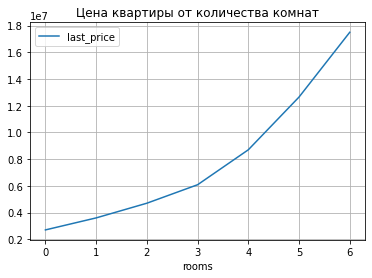

In [82]:
(
    data
    .query('1000000 < last_price < 65000000 and rooms < 7')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid = True, title = 'Цена квартиры от количества комнат')
);

Зависимость роста цен от количества комнат в квартире. Тоже довольно интуитивно понятная зависимость.

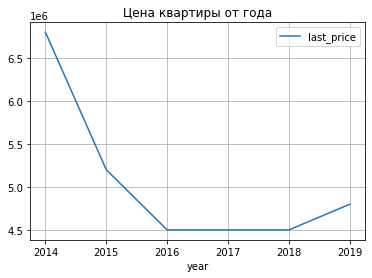

In [83]:
(
    data
    .query('1000000 < last_price < 65000000')
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .sort_values('year')
    .plot(grid = True, title = 'Цена квартиры от года')
);

Из года в год медианная цена на квартиру падала это может быть связано с тем, что площадь продаваемых квартир падала из года в год

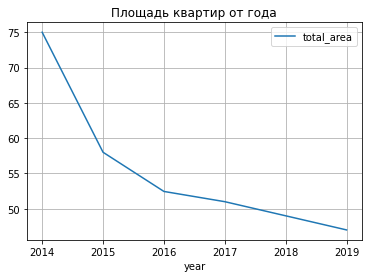

In [84]:
(
    data
    .query('total_area < 200')
    .pivot_table(index='year', values='total_area', aggfunc='median')
    .sort_values('year')
    .plot(grid = True, title = 'Площадь квартир от года')
);

Именно так! с каждым годом все больше квартир продавались с меньшей площадью, тем самым средняя цена квартиры падала, следовательно, чтобы оценить динамику цен на квартиры, то следует посмотреть на график средней цены за квадратный метр от года

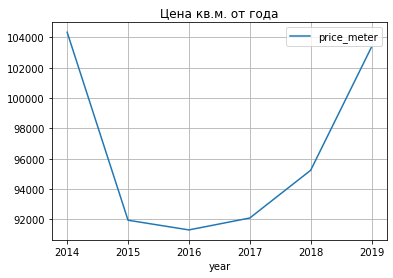

In [85]:
(
    data
    .query('price_meter < 300000')
    .pivot_table(index='year', values='price_meter', aggfunc='median')
    .sort_values('year')
    .plot(grid = True, title = 'Цена кв.м. от года')
);

Здесь уже реальное отражение динамики цен на жилую недвижимость. После кризиса 14 года упали цены и после начался постепенное восстановление к прежним значениям цены за кв.м. Также здесь бы хорошо учесть показатели годовых инфляций, но в данном исследовании этих данных нам достаточно

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай рассмотрим динамику цены и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?
</div>

<div class="alert alert-info">📝
    

Сделано
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный инсайд для заказчика!)
</div>

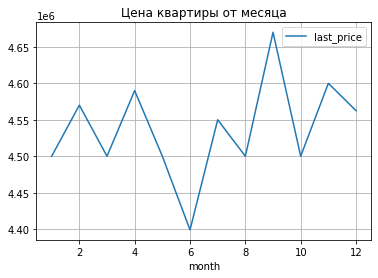

In [86]:
(
    data
    .query('1000000 < last_price < 65000000')
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .sort_values('month')
    .plot(grid = True, title = 'Цена квартиры от месяца')
);

Падение цены в июне скорее всего связано с падением спроса на жилье в этом месяце(маленький процент дельты). Но по большей части строгой зависимости цены от месяца не наблюдается.

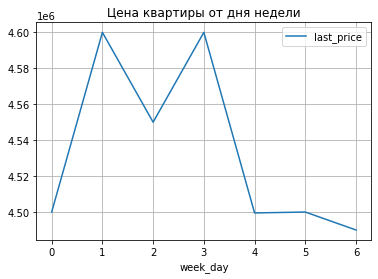

In [87]:
(
    data
    .query('1000000 < last_price < 65000000')
    .pivot_table(index='week_day', values='last_price', aggfunc='median')
    .plot(grid = True, title = 'Цена квартиры от дня недели')
);

Харакетерное снижение медианной цены на выходных (маленький процент дельты). Чем в свою очередь тоже можно пренебречь.

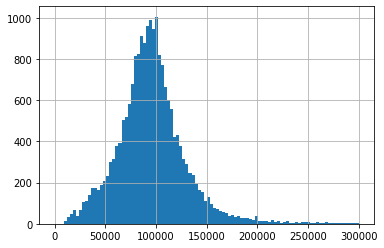

In [88]:
data['price_meter'].hist(bins=100, range=(0,300000));

Берем срез до 300000 за кв.м. 

In [89]:
price_locality = (
    data
    .query('price_meter < 300000')
    .pivot_table(index='locality_name', values='price_meter', aggfunc=['median', 'count'])
)
price_locality.columns = ['price_meter', 'count']

print(price_locality.sort_values('count', ascending=False).head(10))
print()
print('Самая высокая цена из 10 населенных пунктов с высоким количеством объявлений:', 
      price_locality.sort_values('count', ascending=False).head(10).index[0])
print('Самая низкая цена из 10 населенных пунктов с высоким количеством объявлений:', 
      price_locality.sort_values('count', ascending=False).head(10).index[4])

                   price_meter  count
locality_name                        
Санкт-Петербург  102850.890903  13422
Мурино            86111.111111    545
Кудрово           94475.988155    438
Шушары            76125.000000    407
Всеволожск        65789.473684    338
Колпино           74005.089610    308
Пушкин            97938.144330    307
Парголово         91387.362637    302
Гатчина           67187.500000    267
Выборг            57164.842681    206

Самая высокая цена из 10 населенных пунктов с высоким количеством объявлений: Санкт-Петербург
Самая низкая цена из 10 населенных пунктов с высоким количеством объявлений: Всеволожск


Санкт-Петербург значительно обгоняет по предложению жилья, чем все остальные населенные пункты вместе взятые. Также СПб обгоняет ближайших конкурентов по стоимости жилья за квадратный метр. Что в целом сходится с логическими доводами.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, нам нужно найти ТОП-10 районов по кол-ву объявлений, и уже для них посчитать среднюю цену
</div>

<div class="alert alert-info">✍
    

Исправил
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Таблица корректна
</div>

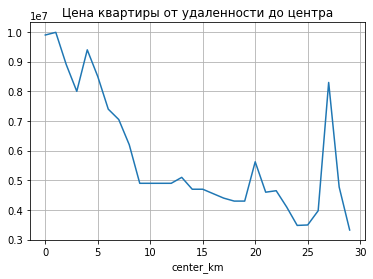

In [90]:
price_center = (
    data
    .query('1000000 < last_price < 65000000 and locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price', aggfunc=['median', 'count'])
)
price_center.columns = ['price', 'count']
price_center['price'].plot(grid = True, title = 'Цена квартиры от удаленности до центра');

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. В твой код добавил заголовок и сетку, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

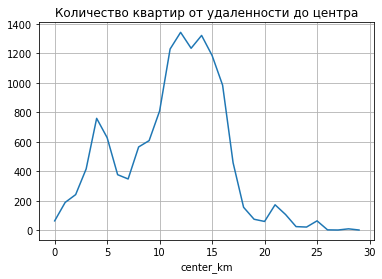

In [91]:
price_center['count'].plot(grid = True, title = 'Количество квартир от удаленности до центра');

Как можно видеть на графиках, по мере удаления от центра, падает стоимость жилья. После 20 км выборка очень маленькая для оценки средней стоимости, следовательно, ее мы не учитываем

### Общий вывод

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует финальный вывод. Ошибка при выгрузке?
</div>

<div class="alert alert-info">✍
    
Написал, а вставить сюда из ворда забыл 0_0
</div>


#### При изучении общей информации о данных были выявлены и устранены такие проблемы как:
1. Пропуски во многих колонках, причем от некоторых избавились путем удаления строк (небольшой процент), а от некоторых, заполнением логичными данными (в некоторых колонках не избавились от пропусков, так как они занимали существенный процент данных, для того чтобы просто удалить и к тому же нельзя было заполнить пропуски логическими значениями;
2. Аномальные значения тоже были удалены, так как их было малое количество;
3. Подправлены типы данных в зависимости от критериев;
4. Явные дубликаты не были найдены, но неявные были определены по столбцу названий населенных пунктов.
Вывод: Пропусков в данных больше в картографических показателях, следовательно нужно провести доработку в сфере сбора данных по данным критериям. Если конкретно, то сбор информации о ближайшем парке дальше 3км не проводился(хотя может оно и не надо). По большей части пропуски в картографических данных не были заполнены. Также пропуски были и в пользовательских данных, и в основном они были в булевых значениях, которые в свою очередь были заполнены логичными значениями. В столбцах по высоте потолков пропуски были заполнены медианными значениями, а также были удалены аномальные значения.

#### Произведена категоризация данных для анализа данных по разным группам. 
Для этого были созданы новые столбцы в датафрейме при помощи новых функций. Конкретно был созданы столбцы: по различным типам этажей, цена за кв.м., распределение по годам, месяцам, и дням недели.

В исправленном датафрейме были исследованы данные и найдены интересные закономерности, такие как:

-	Многие критерии подчиняются закономерности распределения Пуассона;
-	Спад количества публикаций летом и зимой, связанный с отпусками и новогодними праздниками;
-	Спад количества объявлений в выходные;
-	Найдена техническая особенность платформы, при которой объявление автоматичеки снимается при прошествии определенного времени;
-	В среднем продажа квартиры осуществляется за 93 дня;
-	Параметр цены квартиры очень сильно зависит от общей площади, количества комнат, расстояния до центра;
-	Цена немного зависит от месяца и дня продажи, типа этажа и площади отдельных помещений;
-	Видна зависимость средней цены квадратного метра квартиры от года продажи, где на графике отображены значения, схожие с реальностью;
-	В данных по количеству объявлений значительно всех превышает Санкт-Петербург (причем вместе взятых);
-	Средняя стоимость за квадратный метр среди 10 населенных пунктов с высоким количеством объявлений больше всех в Санкт-Петербурге и меньше всех в Всеволожске.

#### Все вышеописанные зависимости в имеющихся данных прослеживаются, причем имеются некоторые детали:
1. В некоторых группах малая выборка, тем самым значения по ним не являются достоверными и не использовались для вывода;
2. Для повышения достоверности значения корреляции параметров использовались срезы данных, которые были определены по гистограммам распределения критериев;
3. На распределении количества этажей в доме были замечены всплески значений, которые отображают количество типовых застроек;
4. Было замечено аномальное количество значений жилой площади, которая равна 30 кв.м. ;
5. Первый этаж оказался самым дешевым по средней цене, чуть дороже последний, а самые дорогие этажи остальные.


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Оформление проекта

2) Типы данных

3) ТОП-10

4) Финальный вывод

5) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

6) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод